In [ ]:
# ! pip install pydot

In [14]:
import os

In [32]:
os.chdir(r"C:\Users\Rahul Sharma\Downloads\dataset")
Dataset =r"C:\Users\Rahul Sharma\Downloads\dataset"
Data_Dir= os.listdir(Dataset)
print(Data_Dir)

['with mask', 'without mask']


In [33]:
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

In [34]:
img_rows , img_cols =112,112
images = []
labels = []
for category in Data_Dir:
    folder_path=os.path.join(Dataset,category) 
    
    for img in os.listdir(folder_path):
        img_path=os.path.join(folder_path,img)
        img=cv2.imread(img_path)
        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)           
            #Coverting the image into gray scale
            resized=cv2.resize(gray,(img_rows,img_cols))
            images.append(resized)
            labels.append(category)
            #appending the image and the label(categorized) into the list (dataset)
        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

images = np.array(images)/255.0            
images = np.reshape(images,(images.shape[0],img_rows,img_cols,1))

lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)
lables = np.array(labels)
(train_x,test_x,train_y, test_y)=train_test_split(images,labels,test_size=0.25,random_state=0)

In [35]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint



num_classes =2
batch_size = 32


model=Sequential()

model.add(Conv2D(64,(3,3),input_shape=(img_rows,img_cols,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

#model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 110, 110, 64)      640       
_________________________________________________________________
activation (Activation)      (None, 110, 110, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 55, 55, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 53, 53, 128)       73856     
_________________________________________________________________
activation_1 (Activation)    (None, 53, 53, 128)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 86528)             0

In [36]:
from keras.optimizers import Adam

epochs = 50
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])

fitted_model = model.fit(train_x,train_y ,epochs=epochs,validation_split=0.25)


Epoch 1/50
25/25 [==============================] - 10s 388ms/step - loss: 0.9273 - accuracy: 0.5120 - val_loss: 0.6891 - val_accuracy: 0.4690
Epoch 2/50
25/25 [==============================] - 9s 365ms/step - loss: 0.6688 - accuracy: 0.5657 - val_loss: 0.5761 - val_accuracy: 0.8101
Epoch 3/50
25/25 [==============================] - 9s 365ms/step - loss: 0.4976 - accuracy: 0.7916 - val_loss: 0.8878 - val_accuracy: 0.5388
Epoch 4/50
25/25 [==============================] - 9s 370ms/step - loss: 0.5304 - accuracy: 0.7373 - val_loss: 0.4271 - val_accuracy: 0.7946
Epoch 5/50
25/25 [==============================] - 10s 385ms/step - loss: 0.2813 - accuracy: 0.8915 - val_loss: 0.3453 - val_accuracy: 0.8682
Epoch 6/50
25/25 [==============================] - 11s 422ms/step - loss: 0.2026 - accuracy: 0.9216 - val_loss: 0.3518 - val_accuracy: 0.8372
Epoch 7/50
25/25 [==============================] - 11s 440ms/step - loss: 0.1918 - accuracy: 0.9304 - val_loss: 0.2815 - val_accuracy: 0.8915
Ep

In [37]:
import matplotlib.pyplot as plt
print(fitted_model.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


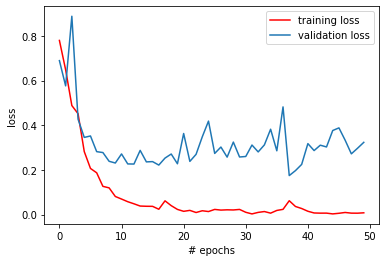

In [38]:
from matplotlib import pyplot as plt

plt.plot(fitted_model.history['loss'],'r',label='training loss')
plt.plot(fitted_model.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

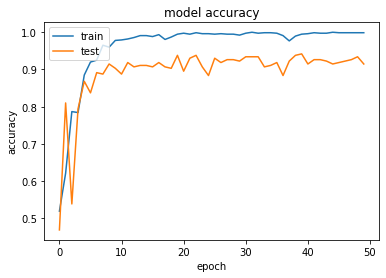

In [39]:
plt.plot(fitted_model.history['accuracy'])
plt.plot(fitted_model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [40]:
model.save('face_mask_detection.h5')

In [ ]:

from tkinter import *
import sqlite3
from keras.models import load_model
import cv2
import numpy as np



def loginPage(logdata):
    sup.destroy()
    global login
    login = Tk()

    user_name = StringVar()
    password = StringVar()

    login_canvas = Canvas(login, width=720, height=440, bg="grey")
    login_canvas.pack()

    login_frame = Frame(login_canvas, bg="white")
    login_frame.place(relwidth=0.8, relheight=0.8, relx=0.1, rely=0.1)

    heading = Label(login_frame, text="Mask App Login", fg="black", bg="white")
    heading.config(font=('calibri 40'))
    heading.place(relx=0.2, rely=0.1)

    # USER NAME
    ulabel = Label(login_frame, text="Username", fg='black', bg='white')
    ulabel.place(relx=0.21, rely=0.4)
    uname = Entry(login_frame, bg='grey', fg='white', textvariable=user_name)
    uname.config(width=42)
    uname.place(relx=0.31, rely=0.4)

    # PASSWORD
    plabel = Label(login_frame, text="Password", fg='black', bg='white')
    plabel.place(relx=0.215, rely=0.5)
    pas = Entry(login_frame, bg='grey', fg='white', textvariable=password)
    pas.config(width=42)
    pas.place(relx=0.31, rely=0.5)

    def check():
        for a, b, c, d in logdata:
            if b == uname.get() and c == pas.get():
                menu()
                break
        else:
            error = Label(login_frame, text="Wrong Username or Password!", fg='black', bg='white')
            error.place(relx=0.37, rely=0.7)

    # LOGIN BUTTON
    log = Button(login_frame, text='Login', padx=5, pady=5, width=5, command=check)
    log.configure(width=15, height=1, activebackground="#33B5E5", relief=FLAT)
    log.place(relx=0.4, rely=0.6)

    login.mainloop()


def signUpPage():
    root.destroy()
    global sup
    sup = Tk()

    fname = StringVar()
    uname = StringVar()
    passW = StringVar()
    country = StringVar()

    sup_canvas = Canvas(sup, width=720, height=440, bg="grey")
    sup_canvas.pack()

    sup_frame = Frame(sup_canvas, bg="white")
    sup_frame.place(relwidth=0.8, relheight=0.8, relx=0.1, rely=0.1)

    heading = Label(sup_frame, text="Mask App SignUp", fg="black", bg="white")
    heading.config(font=('calibri 40'))
    heading.place(relx=0.2, rely=0.1)

    # full name
    flabel = Label(sup_frame, text="Full Name", fg='black', bg='white')
    flabel.place(relx=0.21, rely=0.4)
    fname = Entry(sup_frame, bg='grey', fg='white', textvariable=fname)
    fname.config(width=42)
    fname.place(relx=0.31, rely=0.4)

    # username
    ulabel = Label(sup_frame, text="Username", fg='black', bg='white')
    ulabel.place(relx=0.21, rely=0.5)
    user = Entry(sup_frame, bg='grey', fg='white', textvariable=uname)
    user.config(width=42)
    user.place(relx=0.31, rely=0.5)

    # password
    plabel = Label(sup_frame, text="Password", fg='black', bg='white')
    plabel.place(relx=0.215, rely=0.6)
    pas = Entry(sup_frame, bg='grey', fg='white', textvariable=passW)
    pas.config(width=42)
    pas.place(relx=0.31, rely=0.6)

    # country
    clabel = Label(sup_frame, text="Country", fg='black', bg='white')
    clabel.place(relx=0.215, rely=0.7)
    c = Entry(sup_frame, bg='grey', fg='white', textvariable=country)
    c.config(width=42)
    c.place(relx=0.31, rely=0.7)

    def addUserToDataBase():
        fullname = fname.get()
        username = user.get()
        password = pas.get()
        country = c.get()

        conn = sqlite3.connect('mask.db')
        create = conn.cursor()
        create.execute('CREATE TABLE IF NOT EXISTS userSignUp(FULLNAME text, USERNAME text,PASSWORD text,COUNTRY text)')
        create.execute("INSERT INTO userSignUp VALUES (?,?,?,?)", (fullname, username, password, country))
        conn.commit()
        create.execute('SELECT * FROM userSignUp')
        z = create.fetchall()
        print(z)
        conn.close()
        loginPage(z)

    def gotoLogin():
        conn = sqlite3.connect('mask.db')
        create = conn.cursor()
        conn.commit()
        create.execute('SELECT * FROM userSignUp')
        z = create.fetchall()
        loginPage(z)

    # signup BUTTON
    sp = Button(sup_frame, text='SignUp', padx=5, pady=5, width=5, command=addUserToDataBase)
    sp.configure(width=15, height=1, activebackground="#33B5E5", relief=FLAT)
    sp.place(relx=0.4, rely=0.8)

    log = Button(sup_frame, text='Already have a Account?', padx=5, pady=5, width=5, command=gotoLogin, bg="white")
    log.configure(width=16, height=1, activebackground="#33B5E5", relief=FLAT)
    log.place(relx=0.4, rely=0.9)

    sup.mainloop()


def menu():
    login.destroy()
    global menu
    menu = Tk()

    menu_canvas = Canvas(menu, width=720, height=440, bg="grey")
    menu_canvas.pack()

    menu_frame = Frame(menu_canvas, bg="white")
    menu_frame.place(relwidth=0.8, relheight=0.8, relx=0.1, rely=0.1)

    wel = Label(menu_canvas, text=' W E L C O M E  T O  M A S K  C H E C K ', fg="white", bg="GREY")
    wel.config(font=('Broadway 22'))
    wel.place(relx=0.05, rely=0.02)


    var = IntVar()
    easyR = Radiobutton(menu_frame, text='Check', bg="white", font="calibri 16", value=1, variable=var)
    easyR.place(relx=0.25, rely=0.4)

    def navigate():
        x = var.get()
        print(x)
        if x == 1:
            menu.destroy()
            mask()

    letsgo = Button(menu_frame, text="Let's Go", bg="white", font="calibri 12", command=navigate)
    letsgo.place(relx=0.25, rely=0.8)
    menu.mainloop()

def mask():

 
    model = load_model(r'C:\Users\Rahul Sharma\Downloads\dataset\face_mask_detection.h5')

    face_clsfr = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    source = cv2.VideoCapture(0)

    labels_dict = {0: 'MASK', 1: 'NO MASK'}
    color_dict = {0: (0, 255, 0), 1: (0, 255, 255)}
    
    while(True):
        ret,img=source.read()
        gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        faces=face_clsfr.detectMultiScale(gray,1.3,5)  

        for (x,y,w,h) in faces:
   
            face_img=gray[y:y+w,x:x+w]
            resized=cv2.resize(face_img,(112,112))
            normalized=resized/255.0
            reshaped=np.reshape(normalized,(1,112,112,1))
            result=model.predict(reshaped)

            label=np.argmax(result,axis=1)[0]
     
            cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[label],2)
            cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[label],-1)
            cv2.putText(img, labels_dict[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(0,0,0),2)
       
       
        cv2.imshow('LIVE',img)
        key=cv2.waitKey(1)
   
        if(key==27):
            break
       
    cv2.destroyAllWindows()
    source.release()


def start():
    global root
    root = Tk()
    canvas = Canvas(root, width=720, height=440, bg='#87CEFA')
    canvas.grid(column=0, row=1)
    canvas.create_image(50, 10,  anchor=NW)

    button = Button(root, text='Click for mask detection', command=signUpPage)
    button.configure(width=102, height=2, activebackground="#33B5E5", relief=RAISED)
    button.grid(column=0, row=1)
    

    root.mainloop()


if __name__ == '__main__':
    start()

In [51]:
# model = load_model(r'C:\Users\Rahul Sharma\Downloads\dataset\face_mask_detection.h5')

# face_clsfr=cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_frontalface_default.xml')

# source=cv2.VideoCapture(0)

# labels_dict={0:'MASK',1:'NO MASK'}
# color_dict={0:(0,255,0),1:(0,255,255)}


In [18]:
print( face_clsfr.empty() )

False


In [52]:
# while(True):

#     ret,img=source.read()
#     gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#     faces=face_clsfr.detectMultiScale(gray,1.3,5)  

#     for (x,y,w,h) in faces:
   
#         face_img=gray[y:y+w,x:x+w]
#         resized=cv2.resize(face_img,(112,112))
#         normalized=resized/255.0
#         reshaped=np.reshape(normalized,(1,112,112,1))
#         result=model.predict(reshaped)

#         label=np.argmax(result,axis=1)[0]
     
#         cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[label],2)
#         cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[label],-1)
#         cv2.putText(img, labels_dict[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(0,0,0),2)
           
#     cv2.imshow('LIVE',img)
#     key=cv2.waitKey(1)
   
#     if(key==27):
#         break
       
# cv2.destroyAllWindows()
# source.release()


